# Data + Correlation Visualization

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.base import BaseEstimator

As our dataset we will use the WORLD-OWID-Features dataset, which I extracted from the normal WORLD-OWID dataset.

you can see the feature engineering in the following notebook. sharable link: http://localhost:8888/lab/tree/Feature%20engineering.ipynb

In [21]:
df = pd.read_csv('WORLD-OWID-Features')
df

,year,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,1750,317.372711,9.351,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1,1751,317.372711,9.351,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
2,1752,317.372711,9.354,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
3,1753,317.372711,9.354,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
4,1754,317.372711,9.358,9.358,256.309556,1814.698707,4316.805465,3625.609168,82.069576
...,...,...,...,...,...,...,...,...,...
267,2017,1507.923000,36096.738,14506.974,391.992000,7144.928000,4331.947000,12242.628000,302.294000
268,2018,1569.218000,36826.508,14746.831,412.116000,7529.847000,4181.356000,12266.017000,302.479000
269,2019,1617.507000,37082.559,14725.978,439.254000,7647.528000,4557.283000,12345.653000,306.639000
270,2020,1637.537000,35264.086,14174.564,407.584000,7556.290000,4057.758000,11191.809000,296.302000


In [22]:
X = df.drop('co2', axis=1)
y = df['co2']
y

0          9.351
1          9.351
2          9.354
3          9.354
4          9.358
         ...    
267    36096.738
268    36826.508
269    37082.559
270    35264.086
271    37123.852
Name: co2, Length: 272, dtype: float64

# Correlation Heatmap 

<Axes: >

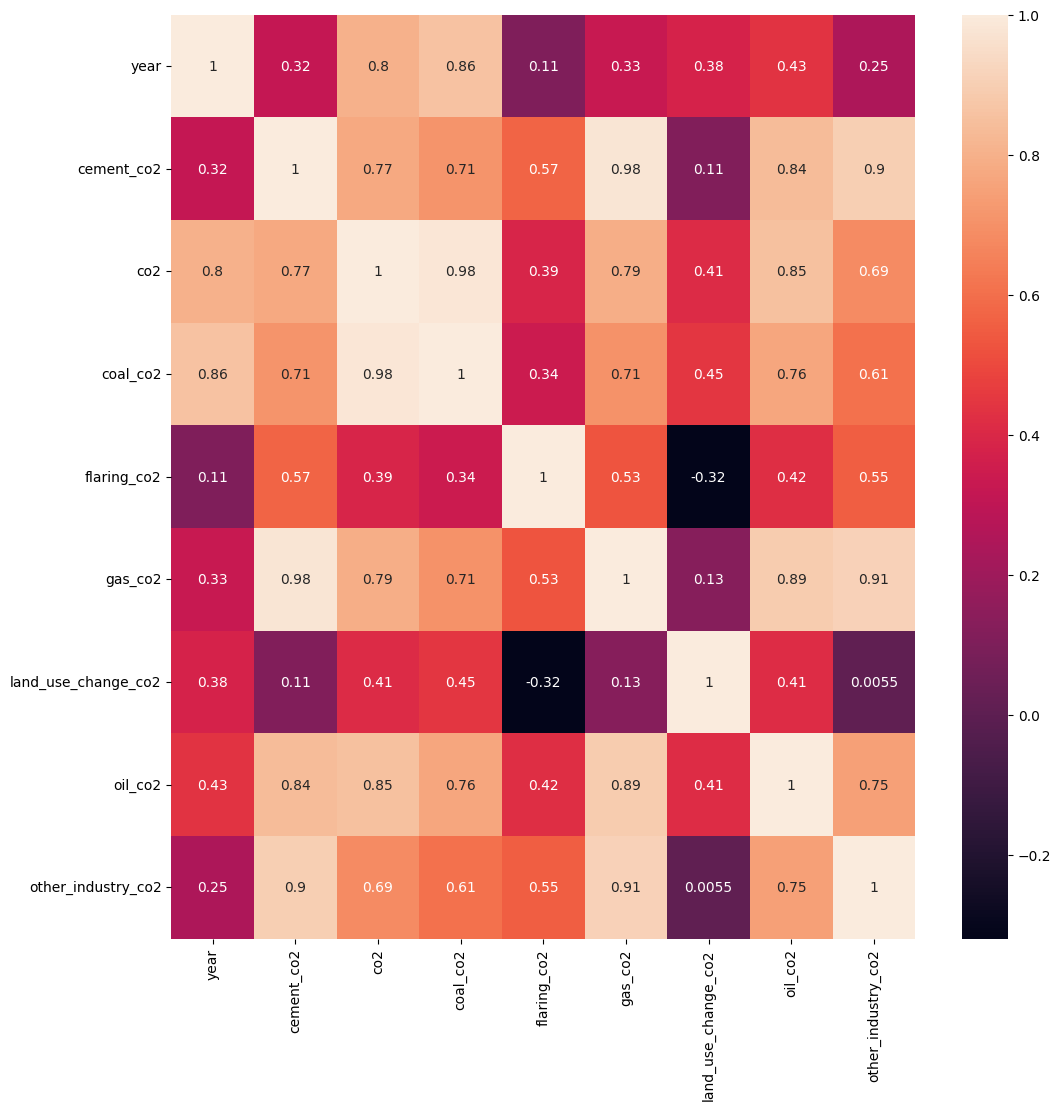

In [2]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

# Splitting data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(190, 7) (82, 7) (190,) (82,)


# Scaling Data Optional

In [ ]:
# Optional 

from sklearn.preprocessing import StandardScaler

# By  scaling our features we can make our models more robust against outliers. 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Helper function Calculate Feature Importances 

In [19]:


class ModelFeatureImportance(BaseEstimator):
    def __init__(self, model_type='linear', degree=2, alpha=1.0, kernel='rbf', C=1.0, gamma='scale', n_estimators=100):
        self.model_type = model_type
        self.degree = degree
        self.alpha = alpha
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.n_estimators = n_estimators

    def _get_model(self):
        if self.model_type == 'linear':
            return LinearRegression()
        elif self.model_type == 'polynomial':
            return PolynomialFeatures(degree=self.degree)
        elif self.model_type == 'ridge':
            return Ridge(alpha=self.alpha)
        elif self.model_type == 'svr':
            return SVR(kernel=self.kernel, C=self.C, gamma=self.gamma)
        elif self.model_type == 'random_forest':
            return RandomForestRegressor(n_estimators=self.n_estimators)
        else:
            raise ValueError(f"Invalid model_type '{self.model_type}'. Supported types are 'linear', 'polynomial', 'ridge', 'svr', and 'random_forest'.")

    def fit(self, X, y):
        model = self._get_model()
        if self.model_type == 'polynomial':
            X_poly = model.fit_transform(X)
            self.model = LinearRegression().fit(X_poly, y)
        else:
            self.model = model.fit(X, y)
        return self

    def feature_importances(self, X, columns=None):
        if self.model_type == 'linear':
            importances = np.abs(self.model.coef_)
        elif self.model_type == 'polynomial':
            importances = np.abs(self.model.coef_[1:])
        elif self.model_type == 'ridge':
            importances = np.abs(self.model.coef_)
        elif self.model_type == 'svr':
            if hasattr(self.model, 'coef_'):
                importances = np.abs(self.model.coef_[0])
            else:
                raise AttributeError("The SVR model does not have a 'coef_' attribute.")
        elif self.model_type == 'random_forest':
            importances = self.model.feature_importances_
        else:
            raise ValueError(f"Invalid model_type '{self.model_type}'.")

        if columns is None:
            columns = X.columns

        feature_importances = pd.DataFrame(importances, index=columns, columns=['importance'])
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        return feature_importances

NameError: name 'BaseEstimator' is not defined

Mean Squared Error: 639.466521015599
R-squared (R2) score: 0.9947808907491354
Mean Absolute Error (MAE): 423.9738822670365
Mean Absolute Percentage Error (MAPE): 151.23999714362662
Symmetric Mean Absolute Percentage Error (SMAPE): 73.07022694084773
